# Elucidata assignment
Date- Febuary 12th 2020

Submitted by- Sumit Kharbanda



# Question 1
1. Data cleaning and gene distrubution across the sample

In [21]:

suppressPackageStartupMessages({
    library(cmapR)
    library(usethis)
    library(devtools)
    library(prada)
    library(stats)
    library(ggplot2)
    library(ggfortify)
    library(GSVA)
})
# Packages used in the assignment

In [3]:

#open the .gct file
paad<- parse.gctx("PAAD.gct", rid = NULL, cid = NULL, matrix_only = F)
a <- paad@mat
b <- na.omit(a) # remove the rows with null values

c <- nrow(a) - nrow(b) # to calculate the number of rows with null value.
c 

parsing as GCT v1.3

PAAD.gct 18465 rows, 183 cols, 0 row descriptors, 124 col descriptors



[1] 4367

There are 4367 genes which have nill values in the data set

# Question 01 
2. Gene expression distrubution for all the samples.

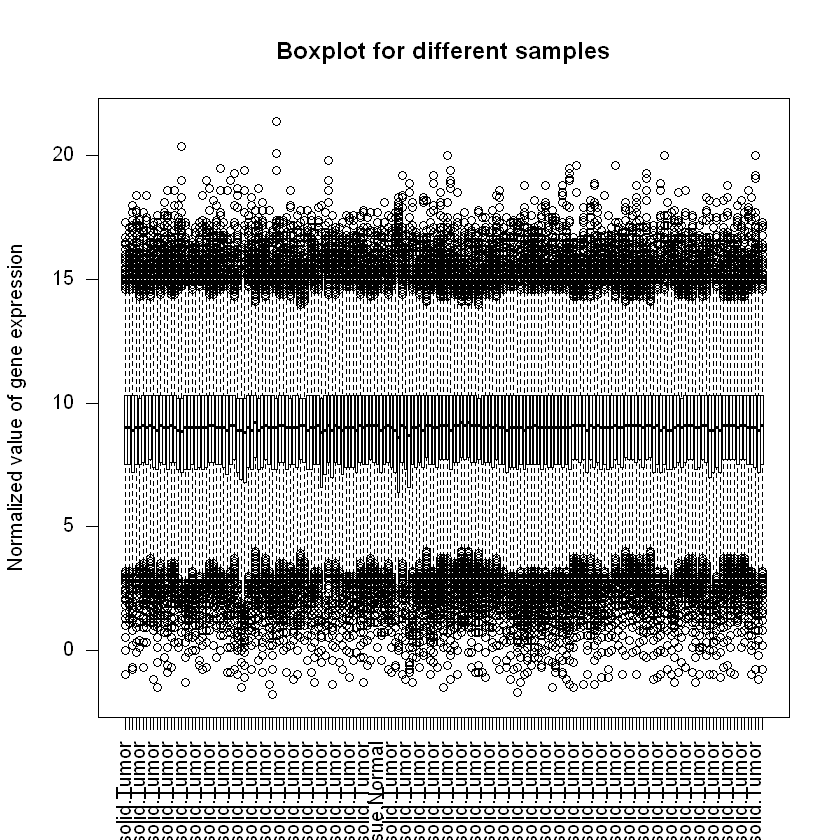

In [5]:
df <- data.frame(b) #convert matrix into the data frame
boxplot(df, 
       main = "Boxplot for different samples",
       ylab = "Normalized value of gene expression",
       las = 2)
# The data is normalized 

The data is normalized and all samples have outliers present in it

# Question 2
1. PCA analysis

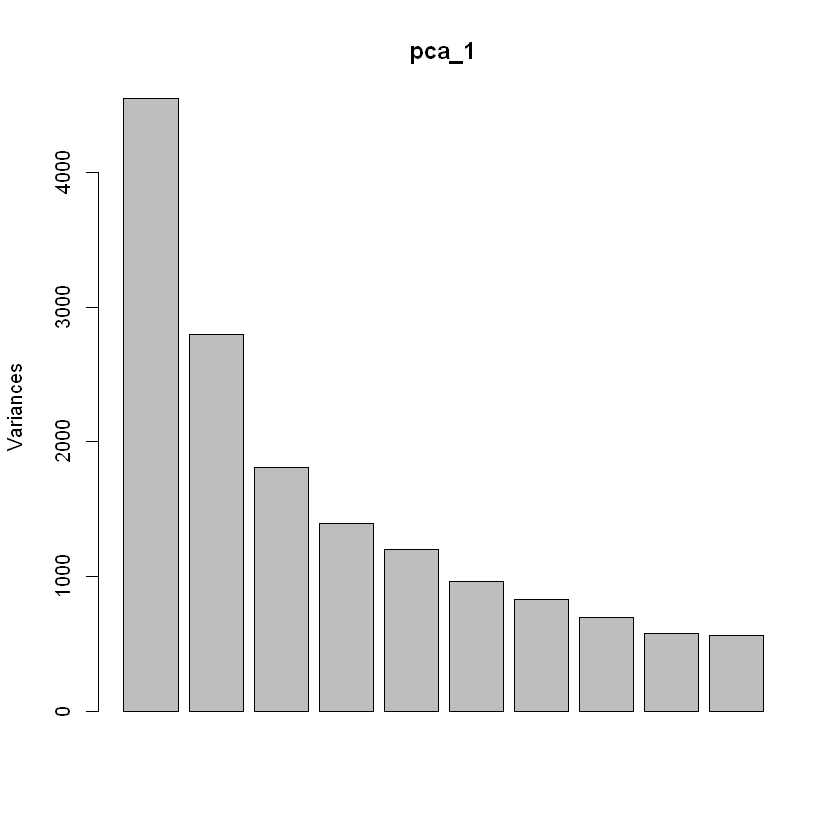

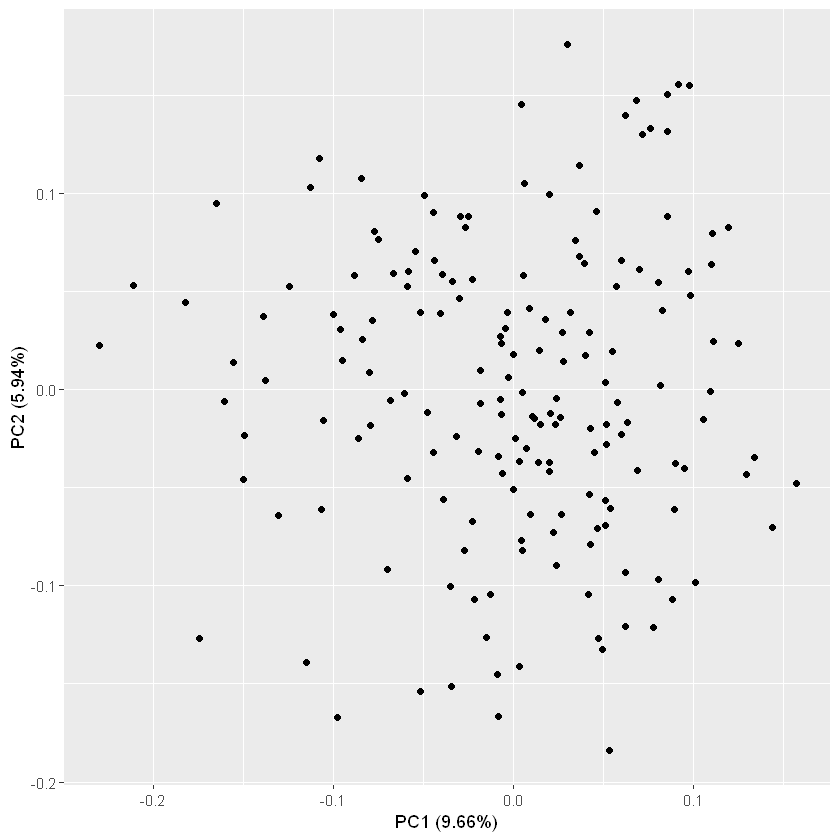

In [33]:
# Replacing null values with the mean of the individual row

# Scale the data 
MinMaxScaling <- function(x){
  return((x-min(x))/max(x)-min(x))
}
    
a <- paad@mat
# Replacing null values with the mean of the individual row
for(i in 1:ncol(a)){
  a[is.na(a[,i]), i] <- mean(a[i,], na.rm = TRUE)
}

at <- t(a) # Create a transpose of the matrix to plot PCA of different samples rather than of Gene
for (i in ncol(at)) {
  at[,i] <- MinMaxScaling(at[,i])
} # scale the data for each gene
pca_1 <- prcomp(at)
plot(pca_1)
autoplot(pca_1)

The data is normalized with minimum and maximum value. 
The PCA plot is different than phantasus as phantasus use different function to normalize the data.
Verified with phantasus and image uploaded on github repository.
The plot clearly shows that there is a separation of neuroendocrine tumours from the adenocarcinoma. 
<img src="newplot.png">. 

When compared with Phantasus, there is issue with out PCA analysis

Part 5
Remove endocrine carcinoma tumor form the file

In [10]:
cbind(paad@cdesc$histological_type_other)

invasive adenocarcinoma
"invasive, well-differentiated"
NA
NA
NA
NA
NA
NA
invasive adenocarcinoma
poorly differentiated adenocarcinoma
NA


In [11]:
cbind(paad@cdesc$histological_type_other[c(23,30,31,32,33,34,35,37)])

neuroendocrine
neuroendocrine carcinoma nos
neuroendocrine carcinoma nos
neuroendocrine carcinoma nos
neuroendocrine carcinoma nos
neuroendocrine carcinoma nos
82463 neuroendocrine carcinoma nos
neuroendocrine carcinoma


In [12]:
paad@mat <- paad@mat[,-c(23,30,31,32,33,34,35,37)]
paad@cid <- paad@cid[-c(23,30,31,32,33,34,35,37)]
paad@cdesc <- paad@cdesc[-c(23,30,31,32,33,34,35,37),]
# create a subset excluding the neuroendocrine tumor.


In [15]:
write.gctx(paad, "paad_1.gct", appenddim = T, compression_level = 0,
           matrix_only = F,
           max_chunk_kb = 1024) #create new gct file without neuroendocrine samples

./paad_1.gct_n175x18465.gctx exists, removing

writing ./paad_1.gct_n175x18465.gctx

chunk sizes:	1000	131

Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(nchar(obj), na.rm = TRUE):
"no non-missing arguments to max; returnin

# Question 03
Understand the effect of interferons in Pancreatic Adenocarcinoma

1. Part 1
Gene Expression values of IFNs for pancreatic adenocarcinoma

parsing as GCT v1.3

PAAD.gct 18465 rows, 183 cols, 0 row descriptors, 124 col descriptors

Warning message in .local(expr, gset.idx.list, ...):
"2837 genes with constant expression values throuhgout the samples."
Warning message in .local(expr, gset.idx.list, ...):
"Since argument method!="ssgsea", genes with constant expression values are discarded."


Estimating GSVA scores for 1 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 4 cores
  |======================================================================| 100%


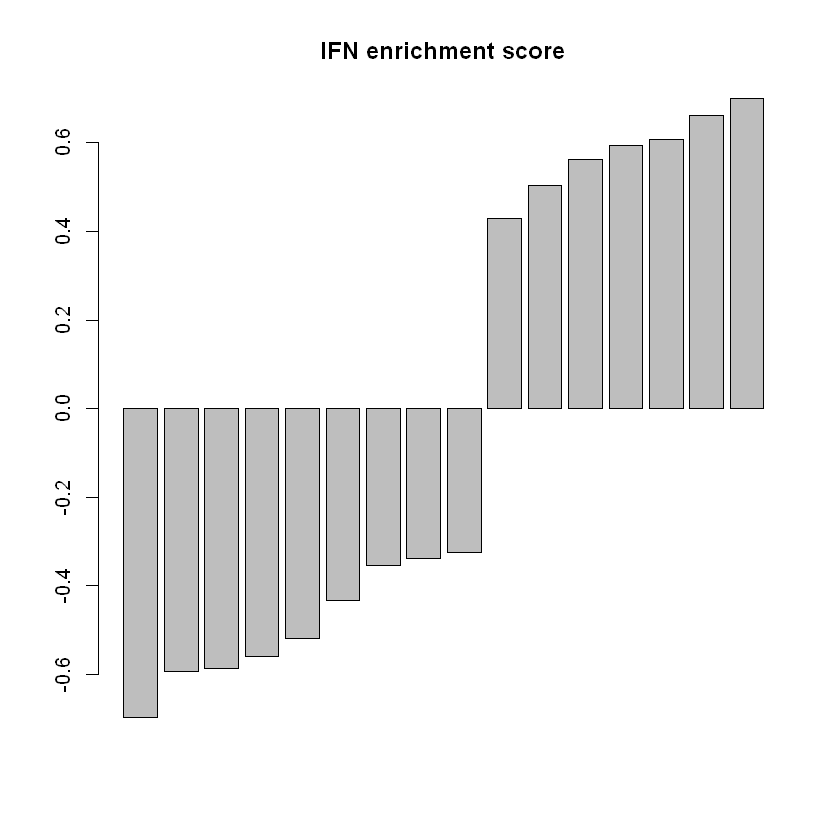

In [25]:
paad_1<- parse.gctx("PAAD.gct", rid = NULL, cid = NULL, matrix_only = F)
adenocarcinoma <- paad_1@mat[,c(1,2,9,10,43,70,71,82,97,105,107,108,111,112,170,178)] 
# samples with adenocarcinoma tumor.
gene <- read.table("type1_IFN.txt", quote="\"", comment.char="")
gs_score <- gsva(adenocarcinoma, gene, method = "gsva",  mx.diff=FALSE) 
# use GSVA to get the enrichment score of the IFNs.
gs_score <- sort(gs_score)

barplot(gs_score, main = "IFN enrichment score")



Yes, we can plot the gene expression values for IFNs genes particularly for adenocarcinoma.

In [18]:
gene <- read.table("type1_IFN.txt", quote="\"", comment.char="")

gs_score <- gsva(a, gene, method = "gsva",  mx.diff=FALSE)

Warning message in .local(expr, gset.idx.list, ...):
"4367 genes with constant expression values throuhgout the samples."
Warning message in .local(expr, gset.idx.list, ...):
"Since argument method!="ssgsea", genes with constant expression values are discarded."


Estimating GSVA scores for 1 gene sets.
Computing observed enrichment scores
Estimating ECDFs with Gaussian kernels
Using parallel with 4 cores
  |======================================================================| 100%


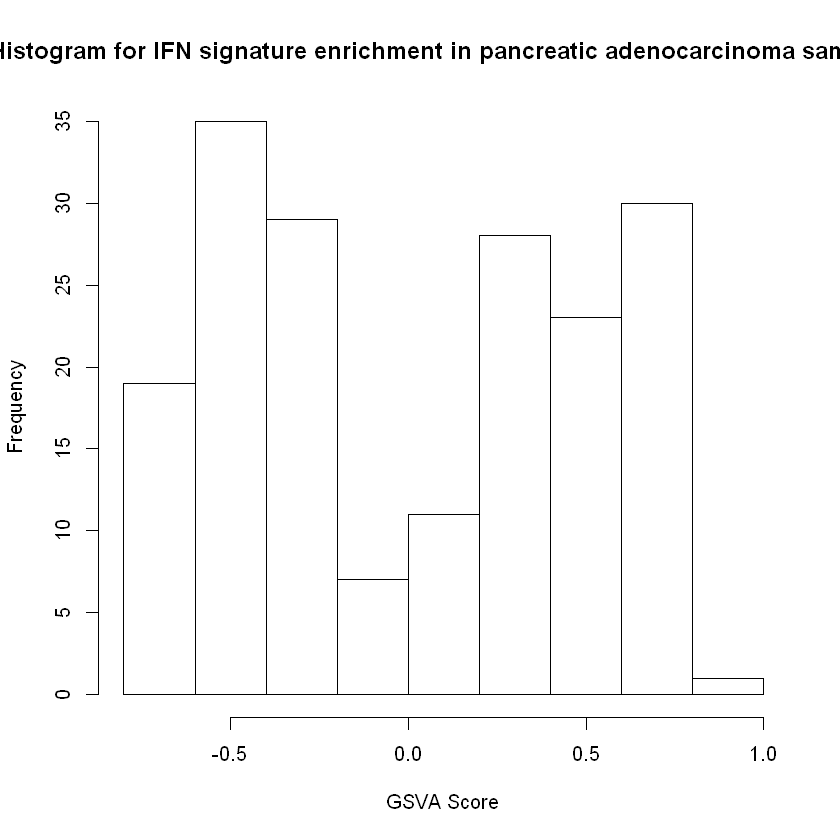

In [20]:
hist(gs_score, xlab = "GSVA Score",
     main = paste("Histogram for IFN signature enrichment in pancreatic adenocarcinoma samples"))

In [31]:
mean(gs_score)

[1] 0.009587196

In [32]:
median(gs_score)

[1] 0.1400251

In [33]:
min(gs_score)

[1] -0.7669964

In [34]:
max(gs_score)

[1] 0.8048715

To check the deviation from zero

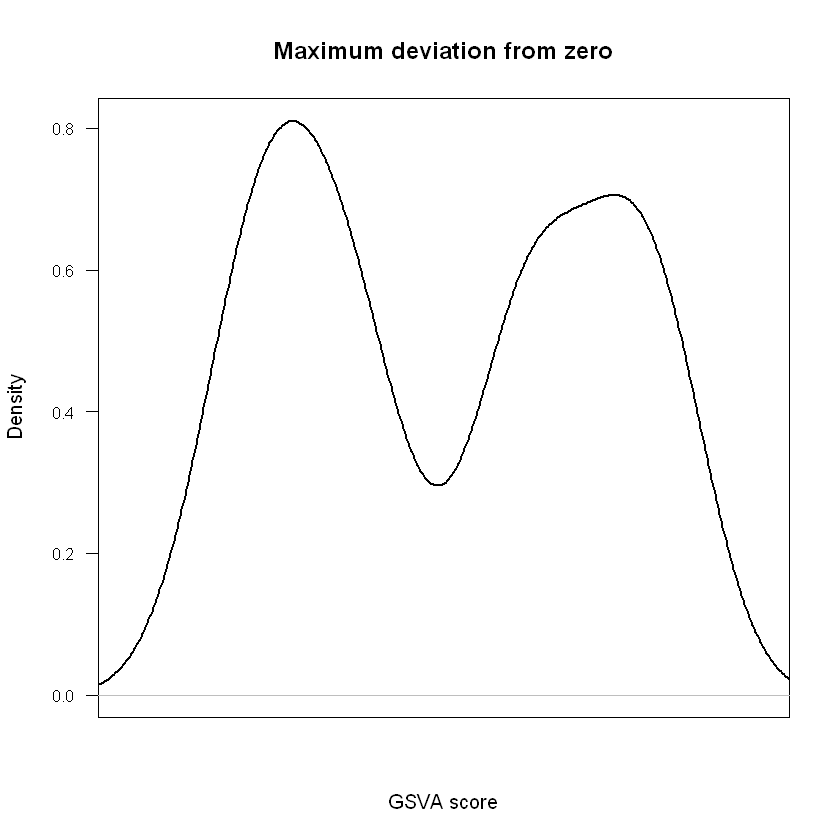

In [35]:
plot(density(as.vector(gs_score)), main="Maximum deviation from zero", xlab="GSVA score", lwd=2, las=1, xaxt="n", , cex.axis=0.8, xlim=c(-1, 1))

The above data shows that IFN signatures can be used to characterize the tumor samples. Most of the populace has a positive enrichment of the signature based on the median of the GSVA score. Also the populace can be divided into two subtypes based on the presence of IFN type 1 signature enrichment.